# Matplotlib summarizing course 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Introduction 

- We will use the interface (pyplot) to create two kinds of objects
        1. Figure object
        2. Axes object

In [4]:
# import the seattle_weather.csv dataset
seattle_weather = pd.read_csv("..\Datasets\seattle_weather.csv")

In [11]:
austin_weather = pd.read_csv("..\Datasets\austin_weather.csv")

OSError: [Errno 22] Invalid argument: '..\\Datasets\x07ustin_weather.csv'

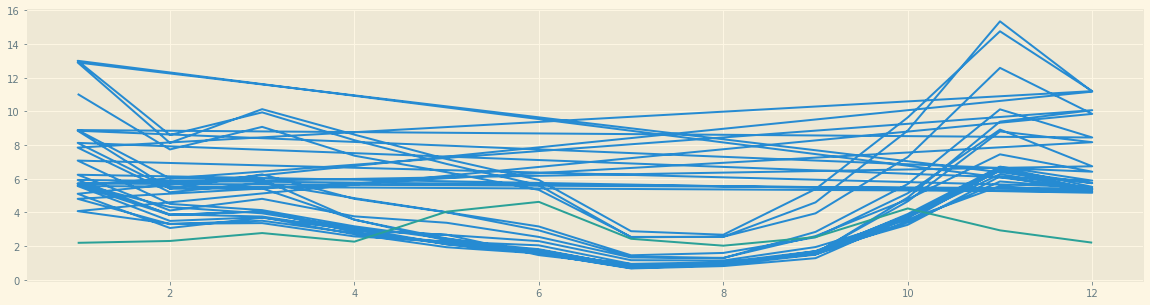

In [68]:
# Create figure and axes using plt.subplots
fig, ax = plt.subplots(figsize = [20,5])
# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["DATE"], seattle_weather["MLY-PRCP-NORMAL"] )
# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["DATE"], austin_weather["MLY-PRCP-NORMAL"] )
#Call show function to show the results
plt.show()

## 2. Customizing the data


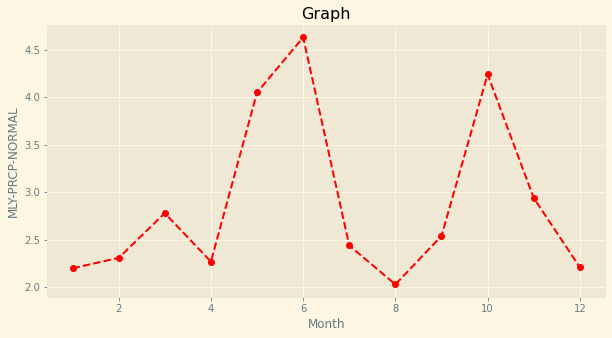

In [69]:
#Customizing data apperance
#Customizing the data apperance using markers and linestyles
#Customimze the x-axis, y-axis and label


#Creating figure
fig1, ax1 = plt.subplots(figsize = [10,5])
# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax1.plot(austin_weather["DATE"], austin_weather["MLY-PRCP-NORMAL"], marker = 'o', linestyle = '--' , color = 'red')

# Customize the x-axis, y-axis and title
ax1.set_xlabel("Month")
ax1.set_ylabel("MLY-PRCP-NORMAL")
ax1.set_title("Graph")


plt.show()

## 3. Small Multiples

- Small Multiples are used to plot several datasets side-by-side. They are created using (plt.subplots())

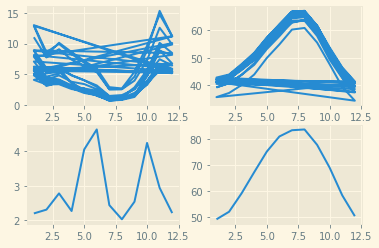

In [70]:
#Creating the figure
fig, ax = plt.subplots(2,2)

ax[0][0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-NORMAL'])
ax[0][1].plot(seattle_weather['DATE'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1,0].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1,1].plot(austin_weather['DATE'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

### 3.2 Creating small multiples with shared y-axis

When creating small multiples, it is often preferable to make sure that the different plots are displayed with the same scale used on the y-axis. This can be configured by setting the sharey key-word to True.

In this exercise, you will create a Figure with two Axes objects that share their y-axis. As before, the data is provided in seattle_weather and austin_weather DataFrames.

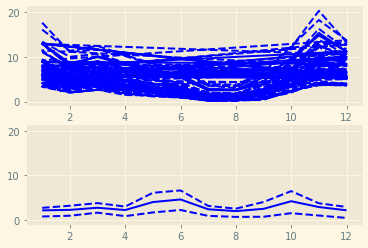

In [71]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-NORMAL'], color = 'blue')
ax[0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-25PCTL'], color = 'blue', linestyle = '--')
ax[0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-75PCTL'], color = 'blue', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-NORMAL'], color = 'blue')
ax[1].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-25PCTL'], color = 'blue', linestyle = '--')
ax[1].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-75PCTL'], color = 'blue', linestyle = '--')

plt.show()

# 2. Plotting time series data 

### 2.1 Read data with time index

Pandas DataFrame objects can have an index that denotes time. This is useful because Matplotlib recognizes that these measurements represent time and labels the values on the axis accordingly.
In this exercise, you will read data from a CSV file called climate_change.csv that contains measurements of CO2 levels and temperatures made on the 6th of every month from 1958 until 2016. You will use Pandas' read_csv function.


In [72]:
# Reading the climate dataset using pandas.
climate_change = pd.read_csv("Datasets_matplotlib\climate_change.csv", parse_dates = ['date'], index_col = ['date'])

In [73]:
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


### 2.2 plot time-series data

To plot time-series data, we use the Axes object plot command. The first argument to this method are the values for the x-axis and the second argument are the values for the y-axis.

This exercise provides data stored in a DataFrame called climate_change. This variable has a time-index with the dates of measurements and two data columns: "co2" and "relative_temp".

In this case, the index of the DataFrame would be used as the x-axis values and we will plot the values stored in the "relative_temp" column as the y-axis values. We will also properly label the x-axis and y-axis.

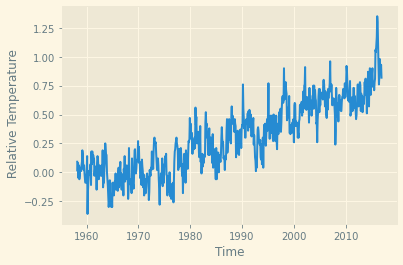

In [74]:
# Create a figure
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change['relative_temp'])

ax.set_xlabel('Time')
ax.set_ylabel(' Relative Temperature')

#Show the figure
plt.show()

### 2.3 Using a time index to zoom in 

When a time-series is represented with a time index, we can use this index for the x-axis when plotting. We can also select a to zoom in on a particular period within the time-series using Pandas' indexing facilities. In this exercise, you will select a portion of a time-series dataset and you will plot that period.

The data to use is stored in a DataFrame called climate_change, which has a time-index with dates of measurements and two data columns: "co2" and "relative_temp".

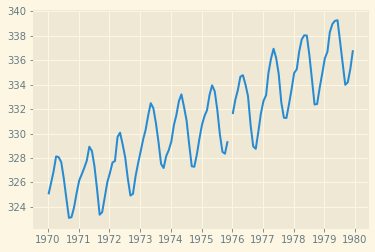

In [75]:
# Creating figure
fig, ax = plt.subplots()

# Zoom-in in for seventies
seventies = climate_change["1970-01-01": "1979-12-31"]

# Add plot timeseries and plot y-axis the ['Co2']
ax.plot(seventies.index, seventies['co2'])

#Show plot.
plt.show()

### 2.4 Plotting two variables

If you want to plot two time-series variables that were recorded at the same times, you can add both of them to the same subplot.

If the variables have very different scales, you'll want to make sure that you plot them in different twin Axes objects. These objects can share one axis (for example, the time, or x-axis) while not sharing the other (the y-axis).

To create a twin Axes object that shares the x-axis, we use the twinx method.

In this exercise, you'll have access to a DataFrame that has the climate_change data loaded into it. This DataFrame was loaded with the "date" column set as a DateTimeIndex, and it has a column called "co2" with carbon dioxide measurements and a column called "relative_temp" with temperature measurements.

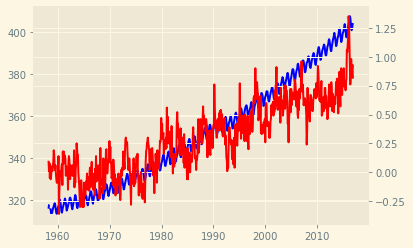

In [76]:
# Initialize a figure and axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color = 'b')

# Create a twin axes that shares the x-axis
ax2 = ax.twinx()

# plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color = 'r')

#Show the graph
plt.show()

### 2.5 Defining a function that plots time-series data

Once you realize that a particular section of code that you have written is useful, it is a good idea to define a function that saves that section of code for you, rather than copying it to other parts of your program where you would like to use this code.

Here, we will define a function that takes inputs such as a time variable and some other variable and plots them as x and y inputs. Then, it sets the labels on the x- and y-axis and sets the colors of the y-axis label, the y-axis ticks and the tick labels.

In [77]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    #plot the provided labels 
    axes.plot(x,y, color = color)
    # Write the xlabel with the provided xlabel in the function
    axes.set_xlabel(xlabel)
    # Write the ylabel with the provided ylabel in the function
    axes.set_ylabel(ylabel)
    #set the color of the ticks params in the y-axis
    axes.tick_params('y', colors = color)

### 2.6 Using a plotting function

Defining functions allows us to reuse the same code without having to repeat all of it. Programmers sometimes say "Don't repeat yourself".

In the previous exercise, you defined a function called plot_timeseries:

plot_timeseries(axes, x, y, color, xlabel, ylabel)
that takes an Axes object (as the argument axes), time-series data (as x and y arguments) the name of a color (as a string, provided as the color argument) and x-axis and y-axis labels (as xlabel and ylabel arguments). In this exercise, the function plot_timeseries is already defined and provided to you.

Use this function to plot the climate_change time-series data, provided as a Pandas DataFrame object that has a DateTimeIndex with the dates of the measurements and co2 and relative_temp columns.

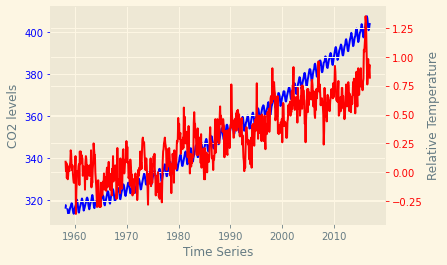

In [78]:
# First create the figure and it axes
fig, axes = plt.subplots()

#plot the CO2 levels versus time series
plot_timeseries(axes, climate_change.index, climate_change['co2'], 'blue', 'Time Series', 'CO2 levels')

#Create a twin axes object that shares the x-axes
ax2 = axes.twinx()

#plot the relative temp versus time series
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'],'red', 'Times Series', 'Relative Temperature')

# Plot the figyure
plt.show()

### 2.7 Adding Annotations

Annotating a plot allows us to highlight interesting information in the plot. For example, in describing the climate change dataset, we might want to point to the date at which the relative temperature first exceeded 1 degree Celsius.

For this, we will use the annotate method of the Axes object. In this exercise, you will have the DataFrame called climate_change loaded into memory. Using the Axes methods, plot only the relative temperature column as a function of dates, and annotate the data.

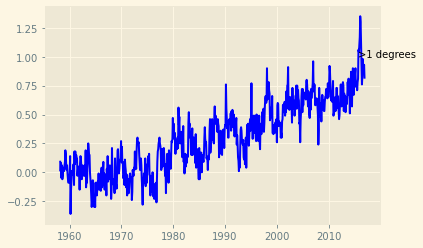

In [79]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['relative_temp'], color = 'b')

# Annotate the date at which the temperature exceed 1 degree celsius
ax.annotate('>1 degrees', xy = [pd.Timestamp('2015-10-06'), 1]);

### 2.8 Plotting time-series: putting it all together

In this exercise, you will plot two time-series with different scales on the same Axes, and annotate the data from one of these series.

The CO2/temperatures data is provided as a DataFrame called climate_change. You should also use the function that we have defined before, called plot_timeseries, which takes an Axes object (as the axes argument) plots a time-series (provided as x and y arguments), sets the labels for the x-axis and y-axis and sets the color for the data, and for the y tick/axis labels:

plot_timeseries(axes, x, y, color, xlabel, ylabel)

Then, you will annotate with text an important time-point in the data: on 2015-10-06, when the temperature first rose to above 1 degree over the average.

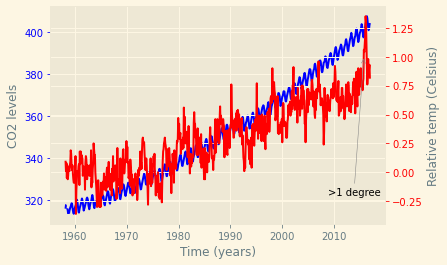

In [80]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temp (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy =(pd.Timestamp('2015-10-06'),1),xytext = (pd.Timestamp('2008-10-06'),-0.2) , arrowprops = {"arrowstyle":"->","color": "gray"});

# 3 Quantitative comparisons and statistical visualizations

In [81]:
# Import the medal datasets 
medals = pd.read_csv("Datasets_matplotlib\medals_by_country_2016.csv", index_col = 0)

In [82]:
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


### 3.1 Bar chart

Bar charts visualize data that is organized according to categories as a series of bars, where the height of each bar represents the values of the data in this category.

For example, in this exercise, you will visualize the number of gold medals won by each country in the provided medals DataFrame. The DataFrame contains the countries as the index, and a column called "Gold" that contains the number of gold medals won by each country, according to their rows.

<ipython-input-83-1244b49a3aba>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation = 90);


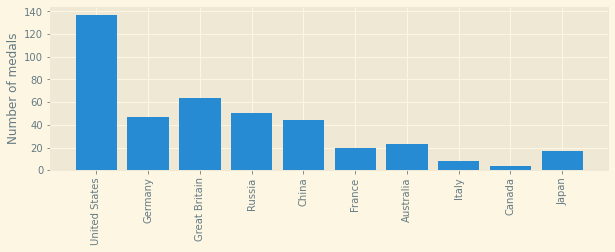

In [83]:
fig, ax = plt.subplots(figsize =[10,3] );
# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'] );

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation = 90);

# Set the y-axis label
ax.set_ylabel('Number of medals');

plt.show();

### 3.2 Stacked bar chart

A stacked bar chart contains bars, where the height of each bar represents values. In addition, stacked on top of the first variable may be another variable. The additional height of this bar represents the value of this variable. And you can add more bars on top of that.

In this exercise, you will have access to a DataFrame called medals that contains an index that holds the names of different countries, and three columns: "Gold", "Silver" and "Bronze". You will also have a Figure, fig, and Axes, ax, that you can add data to.

You will create a stacked bar chart that shows the number of gold, silver, and bronze medals won by each country, and you will add labels and create a legend that indicates which bars represent which medals

<ipython-input-84-587b51dd21c8>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation = 90)


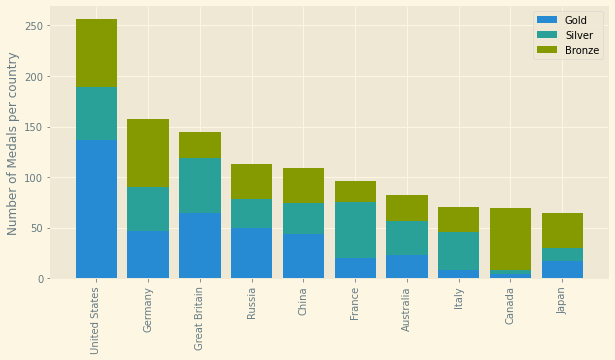

In [84]:
#Create the plot
fig, ax = plt.subplots(figsize = [10,5])

# Add bars for gold with "Gold" label
ax.bar(medals.index, medals['Gold'], label = "Gold");

# Stack on the top of the gold bar the silver medals
ax.bar(medals.index, medals['Silver'], bottom = medals['Gold'], label = "Silver")

#stack on top of silver and the gold the bronze
ax.bar(medals.index, medals['Bronze'], bottom = medals['Gold'] + medals['Silver'], label = 'Bronze')

# Set the xlabels to the countries names
ax.set_xticklabels(medals.index, rotation = 90)

#Set y-label
ax.set_ylabel('Number of Medals per country')

# Attach the legend to the plot
ax.legend()

#show the figure
plt.show();

### 3.3 Creating histograms

In [85]:
# Import the dataset "Summer2016"
df = pd.read_csv("Datasets_matplotlib\summer2016.csv")

In [86]:
#Split the dataframe for the people who are men and rowing
men_rowing = df[(df['Sex'] == 'M') & (df['Sport'] == 'Rowing')]

#Extract the rows where the Sex is male and sport is gymnastics
men_gymnastics = df[(df['Sex'] == 'M') & (df['Sport'] == 'Gymnastics')]

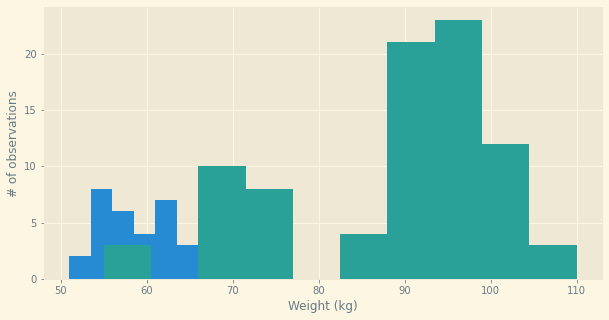

In [87]:
# Create the figure and plot it 
fig, ax = plt.subplots(figsize = [10,5])

#Plot histograms of "Weight" for men_gymnastics
ax.hist(men_gymnastics['Weight'], label = 'Gymnastics')

#plot histogram of weight for men rowing
ax.hist(men_rowing['Weight'], label = 'rowing')

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

# Show the plot
plt.show();

### 3.4 Step histogram

Histograms allow us to see the distributions of the data in different groups in our data. In this exercise, you will select groups from the Summer 2016 Olympic Games medalist dataset to compare the height of medalist athletes in two different sports.

The data is stored in a Pandas DataFrame object called summer_2016_medals that has a column "Height". In addition, you are provided a Pandas GroupBy object that has been grouped by the sport.

In the exercise below, you will visualize and label the histograms of two sports: "Gymnastics" and "Rowing" and see the marked difference between medalists in these two sports.

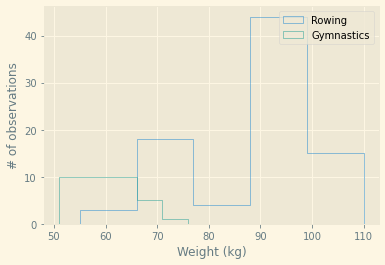

In [88]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(men_rowing['Weight'], label = 'Rowing', histtype = 'step', bins = 5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(men_gymnastics['Weight'], label = 'Gymnastics', histtype = 'step', bins = 5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

### 3.5 Adding error-bars to a bar chart

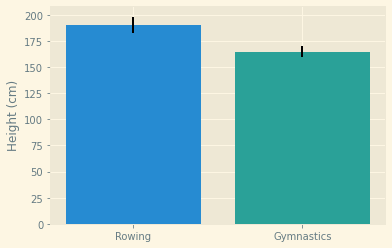

In [89]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", men_rowing['Height'].mean(), yerr=men_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", men_gymnastics['Height'].mean(), yerr = men_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

### 3.6 Adding error bars to the plot

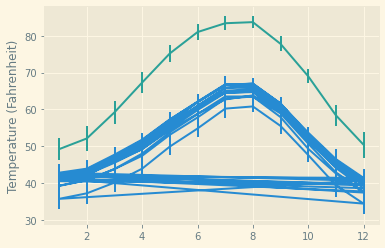

In [90]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['DATE'], seattle_weather['MLY-TAVG-NORMAL'],yerr = seattle_weather['MLY-TAVG-STDDEV'] )

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['DATE'], austin_weather['MLY-TAVG-NORMAL'],yerr = austin_weather['MLY-TAVG-STDDEV'] )

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

### 3.7 Creating box plots

Boxplots provide additional information about the distribution of the data that they represent. They tell us what the median of the distribution is, what the inter-quartile range is and also what the expected range of approximately 99% of the data should be. Outliers beyond this range are particularly highlighted.

In this exercise, you will use the data about medalist heights that you previously visualized as histograms, and as bar charts with error bars, and you will visualize it as boxplots.

Again, you will have the mens_rowing and mens_gymnastics DataFrames available to you, and both of these DataFrames have columns called "Height" that you will compare.

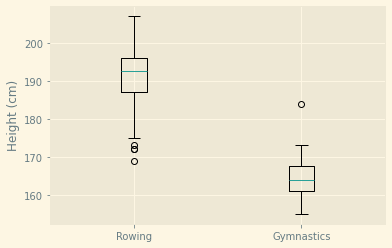

In [91]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([men_rowing['Height'], men_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()



### 3.8 Simple Scatter plot

Scatter are a bi-variate visualization technique. They plot each record in the data as a point. The location of each point is determined by the value of two variables: the first variable determines the distance along the x-axis and the second variable determines the height along the y-axis.

In this exercise, you will create a scatter plot of the climate_change data. This DataFrame, which is already loaded, has a column "co2" that indicates the measurements of carbon dioxide every month and another column, "relative_temp" that indicates the temperature measured at the same time.

In [92]:
# fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'], climate_change['relative_temp'])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

### 3.9 Encoding time by color

The screen only has two dimensions, but we can encode another dimension in the scatter plot using color. Here, we will visualize the climate_change dataset, plotting a scatter plot of the "co2" column, on the x-axis, against the "relative_temp" column, on the y-axis. We will encode time using the color dimension, with earlier times appearing as darker shades of blue and later times appearing as brighter shades of yellow.

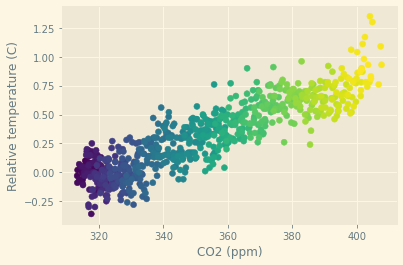

In [93]:
fig, ax = plt.subplots()
#Use the c key-word argument to pass in the index of the DataFrame as input to color each point according to its date.
# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c = climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

# 4. Sharing figures with others

Selecting a style to use affects all of the visualizations that are created after this style is selected.

Here, you will practice plotting data in two different styles. The data you will use is the same weather data we used in the first lesson: you will have available to you the DataFrame seattle_weather and the DataFrame austin_weather, both with records of the average temperature in every month.

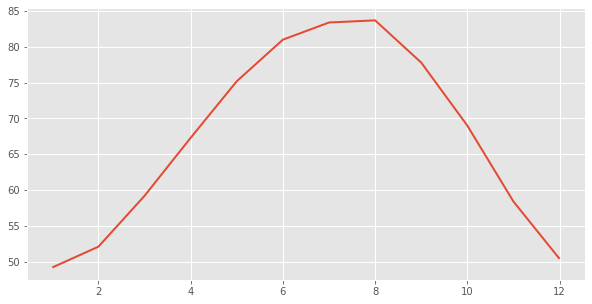

In [94]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize= [10,5])

ax.plot(austin_weather["DATE"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

### 4.1 Switching between styles

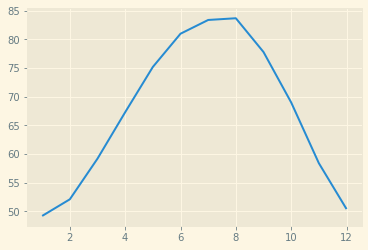

In [95]:
plt.style.use("Solarize_Light2")
fig,ax = plt.subplots()
ax.plot(austin_weather["DATE"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

### 4.2 Sharing your visualization with others

In [96]:
# Save the last image with resolustion 
fig.savefig("Myfigure_300dpi.png", dpi = 300)

### 4.3 Save the figure with different sizes

Save a figure with different sizes
Before saving your visualization, you might want to also set the size that the figure will have on the page. To do so, you can use the Figure object's set_size_inches method. This method takes a sequence of two values. The first sets the width and the second sets the height of the figure.

Here, you will again have a Figure object called fig already provided (you can run plt.show if you want to see its contents). Use the Figure methods set_size_inches and savefig to change its size and save two different versions of this figure.

In [100]:
fig.set_size_inches([5, 3])
fig.savefig("Myfigure_300dpi1.png", dpi = 300)